In [142]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')

import matplotlib.cm as cm
from profiles import NFW,Green
import os
import jsm_prephalo
import jsm_stats
import galhalo
import jsm_halopull

In [2]:
new = jsm_prephalo.MassMat("../../data/perfect-MW-analog/all_mass.npy")

In [3]:
new.prep_data(includenan=False)

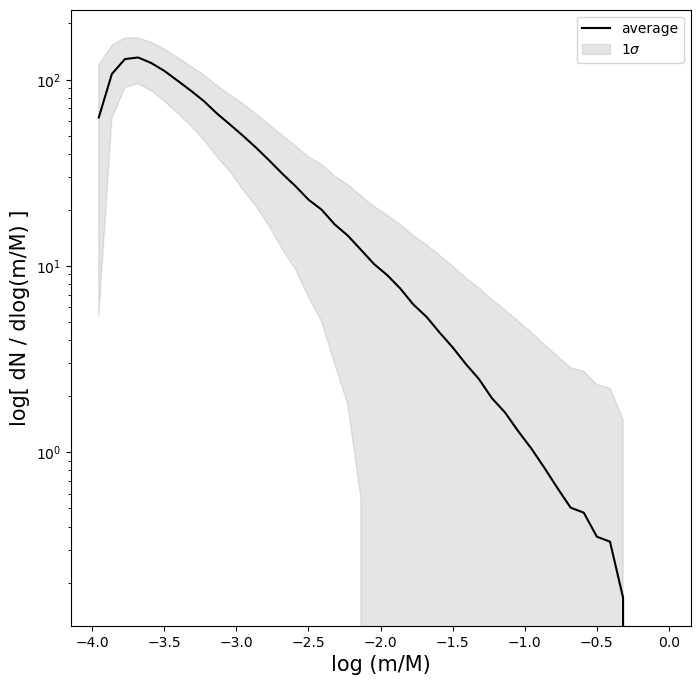

In [4]:
new.SHMF()
new.plot_SHMF()

In [56]:
lgMs = galhalo.SHMR_2D(new.lgMh)

In [69]:
Ntrees = np.array([100,1000,5000,10000])
Ntrees.shape[0]
index = np.arange(lgMs.shape[0])

In [70]:
Pnsat = []
MsMax = []
ecdf_MsMax = []

for i, val in enumerate(Ntrees):
    ind = np.random.choice(index, size=val)
    stat = jsm_stats.SatStats(lgMs[ind])
    stat.Nsat(6.5)
    stat.Maxmass()

    Pnsat.append(stat.Pnsat)
    MsMax.append(stat.Msmax)
    ecdf_MsMax.append(stat.ecdf_MsMax)

In [71]:
Ntree_pnsat = np.array(Pnsat)
Ntree_pnsat.shape

(4, 169)

In [72]:
MsMax[-1].shape

(10000,)

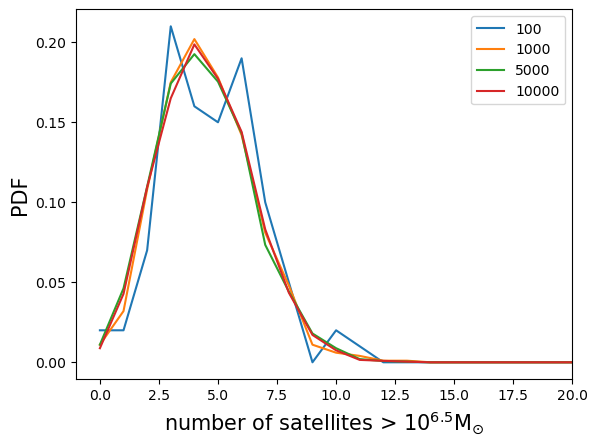

In [73]:
for i, val in enumerate(Ntree_pnsat):
    plt.plot(np.arange(val.shape[0]), val, label=Ntrees[i])
plt.xlabel("number of satellites > $10^{"+str(6.5)+"} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.xlim(-1,20)
plt.legend()
plt.show()

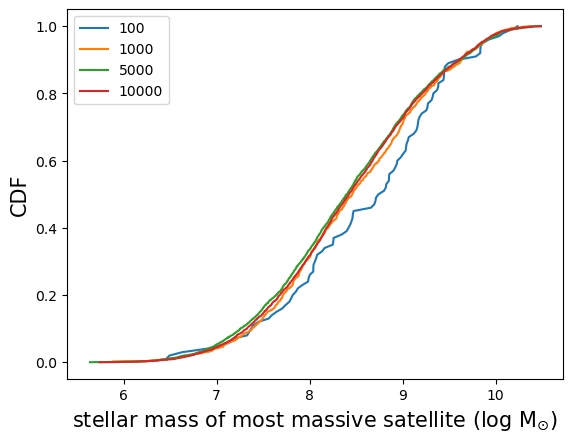

In [74]:
for i, val in enumerate(Ntrees):
    plt.plot(MsMax[i], ecdf_MsMax[i], label=val)
plt.xlabel("stellar mass of most massive satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.legend()
plt.show()

In [9]:
# Mh_3k = np.load("../../data/perfect-MW-analog/acc_surv_mass_og.npy")
# Mh_6k = np.load("../../data/perfect-MW-analog/acc_surv_mass.npy")
# len_6k = np.sum(~np.isnan(Mh_3k), axis=1) # to check the length
# all = np.append(Mh_3k[:,0:350], Mh_6k[:,0:350], axis=0)

# np.save("../../data/perfect-MW-analog/all_mass.npy", all)


In [127]:
acc_mass = np.load("../../data/3000_12_8/acc_mass.npy")
acc_surv_mass = np.load("../../data/3000_12_8/acc_surv_mass.npy")

In [128]:
acc_red = np.load("../../data/3000_12_8/acc_redshift.npy")
acc_surv_red = np.load("../../data/3000_12_8/acc_surv_redshift.npy")

In [129]:
init = np.log10(acc_mass[0][~np.isnan(acc_mass[0])])

surv = np.log10(acc_surv_mass[0][~np.isnan(acc_mass[0])])

In [133]:
mask = np.where(init == surv)[0]



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [182]:
file = "../../data/test_evo/12_4_0/tree_0_evo.npz"
mlres = 1e8

tree = np.load(file)
mass = tree["mass"]
redshift = tree["redshift"]
mass = np.delete(mass, 1, axis=0) #there is some weird bug for this index
mask = mass != -99. # converting to NaN values
mass = np.where(mask, mass, np.nan)  
Nhalo = mass.shape[0]

peak_mass = np.nanmax(mass, axis=1) #finding the maximum mass
peak_index = np.nanargmax(mass, axis=1)
peak_red = redshift[peak_index]

surv_mass = mass[:,0] # the final index is the z=0 time step. this will be the minimum mass for all subhalos
surv_mask = surv_mass > mlres

peak_surv_mass = np.ma.filled(np.ma.masked_array(peak_mass, mask=~surv_mask),fill_value=np.nan) # now selecting only those that are above mlres
peak_surv_red = np.ma.filled(np.ma.masked_array(peak_red, mask=~surv_mask),fill_value=np.nan)

host_mass = mass[0]
f_subhalo = host_mass/np.nansum(mass, axis=0)

In [237]:
host_mass = mass[0]
most_massive = mass[1]

subhalo_mass = np.nansum(mass[1:], axis=0)

In [232]:
wow = subhalo_mass/host_mass

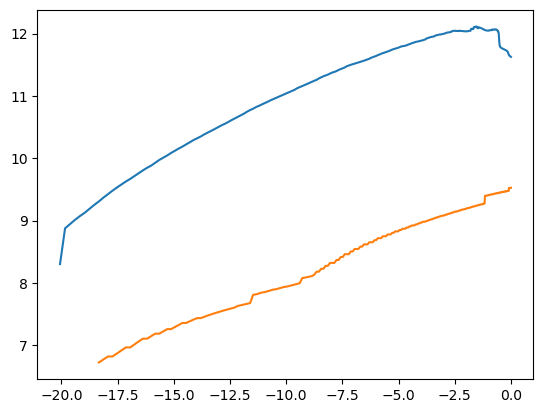

In [238]:
plt.plot(-redshift, np.log10(subhalo_mass))
plt.plot(-redshift, np.log10(most_massive))

In [205]:
np.log10(host_mass[0]) / np.log10(np.nansum(mass, axis=0)[0])


0.9908217549971037

In [204]:

np.log10(host_mass[0])

12.154901959985743

In [195]:
host_mass.shape

(354,)

In [187]:
peak_mass[0:100]

array([1.42857143e+12, 3.36925088e+09, 1.87025251e+08, 1.47364036e+08,
       4.51040369e+08, 1.28116129e+09, 3.76793856e+08, 1.51634016e+08,
       3.80759598e+09, 1.22263411e+09, 1.97860173e+09, 3.07570139e+08,
       1.76350296e+09, 2.52173033e+08, 2.00276859e+08, 4.11895138e+10,
       3.09636061e+08, 1.55981511e+08, 2.16721468e+08, 7.22750691e+10,
       2.20246711e+08, 2.28111894e+08, 4.92340353e+08, 4.03531001e+08,
       3.13969709e+08, 4.46367723e+08, 1.84668685e+08, 1.22060139e+11,
       6.05695643e+08, 2.46843946e+08, 1.53087782e+08, 2.38949210e+09,
       1.50865924e+08, 3.41092273e+08, 1.57332318e+08, 6.24276378e+09,
       1.59105805e+08, 5.29409040e+09, 4.21533409e+08, 2.45683745e+08,
       1.45027790e+08, 3.90173591e+09, 2.71539720e+08, 1.40104877e+10,
       4.86379829e+08, 1.64448562e+08, 1.10314261e+09, 1.95558587e+08,
       4.27926711e+08, 1.95983898e+08, 2.23159668e+08, 2.05306301e+08,
       7.71751955e+08, 2.28204358e+09, 3.42479448e+08, 8.46094220e+08,
      

In [177]:
min_mass.shape

(1590,)

In [176]:
peak_surv_mass.shape

(1590,)

In [100]:
def zbin(z_array, binz=np.linspace(0,15,15)):
    return np.histogram(z_array, bins=binz)[0]

def mbin(m_array, binm=np.linspace(7,13,15)):
    return np.histogram(m_array, bins=binm)[0]

In [88]:
np.apply_along_axis(zbin, 1, acc_red)

array([[163, 230, 269, ...,   2,   3,   2],
       [183, 234, 210, ...,   6,   4,   2],
       [174, 215, 224, ...,   6,   1,   2],
       ...,
       [196, 231, 218, ...,   8,   2,   0],
       [212, 255, 285, ...,   1,   0,   1],
       [174, 219, 272, ...,   4,   1,   0]])

In [99]:
binm=np.linspace(7,13,15)
np.histogram(np.log10(acc_mass[0]), bins=binm)[0]

array([  0,   0, 362, 691, 301,  98,  51,  21,   7,   3,   0,   0,   1,
         0])

In [95]:
binm

array([ 3.        ,  3.64285714,  4.28571429,  4.92857143,  5.57142857,
        6.21428571,  6.85714286,  7.5       ,  8.14285714,  8.78571429,
        9.42857143, 10.07142857, 10.71428571, 11.35714286, 12.        ])

In [92]:
np.log10(acc_mass[0])

array([12.15490196,  8.21757043,  8.7475782 , ...,         nan,
               nan,         nan])